In [1]:
# These are the libraries we are going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To import data set
data1 = pd.read_csv('2006.csv')
data2 = pd.read_csv('2007.csv')

In [3]:
data1.shape

(7141922, 29)

In [4]:
data2.shape

(7453215, 29)

In [5]:
#merging method should have equal no. of columns
data = pd.concat([data1,data2])

In [6]:
data.shape

(14595137, 29)

In [7]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,NaN,0,0,0,0,0,0


Variable descriptions: Name Description <br>  1 Year 1987-2008 <br>2 Month 1-12 <br>3 DayofMonth 1-31 <br>4 DayOfWeek 1 (Monday) - 7 (Sunday)<br> 5 DepTime actual departure time (local, hhm m) <br>6 CRSDepTime scheduled departure time (local, hhmm)<br> 7 ArrTime actual arrival time (local, hhmm)<br> 8 CRSArrTime scheduled arrival time (local, hhmm)<br> 9 UniqueCarrier unique carrier code<br> 10 FlightNum flight number<br> 11 TailNum plane tail number <br>12 ActualElapsedTime in minutes<br> 13 CRSElapsedTime in minutes<br> 14 AirTime in minutes<br> 15 ArrDelay arrival delay, in minutes<br> 16 DepDelay departure delay, in minutes<br> 17 Origin origin IATA airport code<br> 18 Dest des tination IATA airport code<br> 19 Distance in miles<br> 20 TaxiIn taxi in time, in minutes <br> 21 TaxiOut taxi out time in minutes<br> 22 Cancelled was the flight cancelled?<br> 23 CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)<br> 24 Diverted 1 = yes, 0 = no<br> 25 CarrierDelay in minutes<br> 26 WeatherDelay in minutes<br> 27 NASDelay in minutes<br> 28 SecurityDelay in minutes <br>29 LateAircraftDelay in minutes

In [8]:
#To check the total no. of not available values 
data.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                282682
CRSDepTime                  0
ArrTime                316047
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                    22
ActualElapsedTime      316047
CRSElapsedTime            998
AirTime                316047
ArrDelay               316047
DepDelay               282682
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14312454
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

In [9]:
data[data.ArrDelay.isna()].Cancelled.value_counts()

1    282682
0     33365
Name: Cancelled, dtype: int64

In [10]:
notcancelledairplanes = data.query('Cancelled == 0 & Diverted == 0' )

In [11]:
notcancelledairplanes.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,NaN,0,0,0,0,0,0


In [12]:
#changing data type
notcancelledairplanes['DepTime']= notcancelledairplanes['DepTime'].astype(int)

In [13]:
notcancelledairplanes.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,NaN,0,0,0,0,0,0


In [14]:
#changing data type
notcancelledairplanes['DepTime']= notcancelledairplanes['DepTime'].astype(str)

In [15]:
notcancelledairplanes['length'] = notcancelledairplanes['DepTime'].str.len()

In [16]:
notcancelledairplanes.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,length
0,2006,1,11,3,743,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,NaN,0,0,0,0,0,0,3
1,2006,1,11,3,1053,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,NaN,0,0,0,0,0,0,4
2,2006,1,11,3,1915,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,NaN,0,0,0,0,0,0,4
3,2006,1,11,3,1753,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,NaN,0,0,0,0,0,0,4
4,2006,1,11,3,824,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,NaN,0,0,0,0,0,0,3


In [17]:
# for values with only 2 digits, 24 hour method has 00:00, left padding leaves the width as 4
notcancelledairplanes['DepTimenew'] = notcancelledairplanes['DepTime'].str.pad(width = 4, fillchar = '0') 

In [18]:
#shows how many characters are there, len= length, [:1] = first index only, this is extracting hour
notcancelledairplanes['DepHours'] = notcancelledairplanes['DepTimenew'].str[0:2]
# np.where((notcancelledairplanes['length']) == 3, notcancelledairplanes['DepTime'].str[0:1], notcancelledairplanes['DepTime'].str[:2])

In [19]:
#shows how many characters are there, len= length, [:1] = first index only, this is extracting minutes
notcancelledairplanes['DepMinutes'] = notcancelledairplanes['DepTimenew'].str[-2:]

In [20]:
#changing data type
notcancelledairplanes['DepHours']= notcancelledairplanes['DepHours'].astype(int)
notcancelledairplanes['DepMinutes']= notcancelledairplanes['DepMinutes'].astype(int)

In [21]:
notcancelledairplanes.query('DepHours > 24').head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,length,DepTimenew,DepHours,DepMinutes
299844,2006,1,13,5,2755,2023,2923.0,2219,EV,4284,N859AS,88.0,116.0,-1365.0,424.0,452.0,ATL,ABE,692,1443,10,0,NaN,0,0,424,0,0,0,4,2755,27,55
300661,2006,1,2,1,2509,1844,2657.0,2047,EV,4311,N974EV,108.0,123.0,-1351.0,370.0,385.0,ATL,AVP,714,1444,15,0,NaN,0,370,0,0,0,0,4,2509,25,9
300834,2006,1,2,1,2508,2250,2609.0,7,EV,4315,N846AS,61.0,77.0,-1391.0,122.0,138.0,ATL,SDF,321,1442,10,0,NaN,0,0,0,122,0,0,4,2508,25,8
301805,2006,1,2,1,2525,2250,2530.0,2307,EV,4346,N705EV,65.0,77.0,-1383.0,143.0,155.0,ATL,JAN,341,1443,5,0,NaN,0,23,120,0,0,0,4,2525,25,25
301825,2006,1,22,7,2515,2250,2528.0,2307,EV,4346,N702EV,73.0,77.0,-1377.0,141.0,145.0,ATL,JAN,341,1445,5,0,NaN,0,0,141,0,0,0,4,2515,25,15
304705,2006,1,2,1,2500,2250,2610.0,4,EV,4426,N902EV,70.0,74.0,-1389.0,126.0,130.0,ATL,ILM,377,1444,15,0,NaN,0,0,126,0,0,0,4,2500,25,0
306820,2006,1,2,1,2515,2158,2606.0,2302,EV,4498,N760EV,51.0,64.0,-1407.0,184.0,197.0,ATL,CHS,259,1443,15,0,NaN,0,0,184,0,0,0,4,2515,25,15
306970,2006,1,2,1,2505,2132,2558.0,2223,EV,4503,N903EV,113.0,111.0,-1352.0,215.0,213.0,ATL,PIA,564,1445,20,0,NaN,0,0,0,215,0,0,4,2505,25,5
308680,2006,1,2,1,2503,2255,2553.0,2352,EV,4559,N981EV,50.0,57.0,-1408.0,121.0,128.0,ATL,VLD,208,1446,12,0,NaN,0,0,121,0,0,0,4,2503,25,3
309204,2006,1,2,1,2515,2240,2705.0,42,EV,4574,N937EV,110.0,122.0,-1347.0,143.0,155.0,ATL,ROC,749,1446,11,0,NaN,0,0,143,0,0,0,4,2515,25,15


In [22]:
notcancelledairplanes.describe()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,length,DepHours,DepMinutes
count,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,14279090.0,14279090.0,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07,1.427909e+07
mean,2.006510e+03,6.541218e+00,1.572342e+01,3.943168e+00,1.330410e+03,1.484467e+03,1.494512e+03,2.172063e+03,1.261937e+02,1.274648e+02,1.028349e+02,9.451859e+00,1.072296e+01,7.263797e+02,7.024763e+00,1.633590e+01,0.0,0.0,3.716184e+00,7.418885e-01,3.768550e+00,2.789232e-02,4.919834e+00,3.716633e+00,1.310012e+01,2.974303e+01
std,4.999096e-01,3.419741e+00,8.787922e+00,1.993435e+00,4.637868e+02,5.040900e+02,4.802920e+02,1.973189e+03,7.124866e+01,7.049628e+01,7.238262e+01,3.800010e+01,3.479113e+01,5.696938e+02,2.229665e+01,1.143029e+01,0.0,0.0,2.008208e+01,9.185072e+00,1.607641e+01,1.196359e+00,2.081230e+01,4.608264e-01,4.789782e+00,1.770952e+01
min,2.006000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,-2.500000e+01,-1.425000e+03,-5.920000e+02,-1.200000e+03,1.100000e+01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.006000e+03,4.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,1.108000e+03,1.115000e+03,5.830000e+02,7.500000e+01,7.700000e+01,5.400000e+01,-9.000000e+00,-4.000000e+00,3.180000e+02,4.000000e+00,1.000000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,9.000000e+00,1.500000e+01
50%,2.007000e+03,7.000000e+00,1.600000e+01,4.000000e+00,1.321000e+03,1.515000e+03,1.517000e+03,1.491000e+03,1.080000e+02,1.100000e+02,8.400000e+01,-1.000000e+00,0.000000e+00,5.750000e+02,5.000000e+00,1.400000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.300000e+01,3.000000e+01
75%,2.007000e+03,1.000000e+01,2.300000e+01,6.000000e+00,1.720000e+03,1.911000e+03,1.905000e+03,3.431000e+03,1.560000e+02,1.570000e+02,1.310000e+02,1.300000e+01,1.000000e+01,9.540000e+02,8.000000e+00,1.900000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.700000e+01,4.500000e+01
max,2.007000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.955000e+03,2.359000e+03,9.619000e+03,1.879000e+03,6.600000e+02,1.958000e+03,2.598000e+03,2.601000e+03,4.962000e+03,1.501000e+03,6.020000e+02,0.0,0.0,2.580000e+03,1.429000e+03,1.392000e+03,3.820000e+02,1.366000e+03,4.000000e+00,2.900000e+01,5.900000e+01


In [23]:
notcancelledairplanes.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,length,DepTimenew,DepHours,DepMinutes
0,2006,1,11,3,743,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,NaN,0,0,0,0,0,0,3,0743,7,43
1,2006,1,11,3,1053,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,NaN,0,0,0,0,0,0,4,1053,10,53
2,2006,1,11,3,1915,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,NaN,0,0,0,0,0,0,4,1915,19,15
3,2006,1,11,3,1753,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,NaN,0,0,0,0,0,0,4,1753,17,53
4,2006,1,11,3,824,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,NaN,0,0,0,0,0,0,3,0824,8,24


In [24]:
notcancelledairplanes.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,length,DepTimenew,DepHours,DepMinutes
0,2006,1,11,3,743,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,NaN,0,0,0,0,0,0,3,0743,7,43
1,2006,1,11,3,1053,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,NaN,0,0,0,0,0,0,4,1053,10,53
2,2006,1,11,3,1915,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,NaN,0,0,0,0,0,0,4,1915,19,15
3,2006,1,11,3,1753,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,NaN,0,0,0,0,0,0,4,1753,17,53
4,2006,1,11,3,824,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,NaN,0,0,0,0,0,0,3,0824,8,24


In [25]:
notcancelledairplanes.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                     0
CRSDepTime                  0
ArrTime                     0
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime           0
CRSElapsedTime              0
AirTime                     0
ArrDelay                    0
DepDelay                    0
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14279089
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
length                      0
DepTimenew                  0
DepHours                    0
DepMinutes                  0
dtype: int

In [26]:
notcancelledairplanes[notcancelledairplanes.ArrDelay.isna()].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,length,DepTimenew,DepHours,DepMinutes


In [27]:
notcancelledairplanes.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,length,DepTimenew,DepHours,DepMinutes
0,2006,1,11,3,743,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,NaN,0,0,0,0,0,0,3,0743,7,43
1,2006,1,11,3,1053,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,NaN,0,0,0,0,0,0,4,1053,10,53
2,2006,1,11,3,1915,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,NaN,0,0,0,0,0,0,4,1915,19,15
3,2006,1,11,3,1753,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,NaN,0,0,0,0,0,0,4,1753,17,53
4,2006,1,11,3,824,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,NaN,0,0,0,0,0,0,3,0824,8,24


In [28]:
checkingdelays = notcancelledairplanes.groupby(['Year','Month','DayofMonth','DayOfWeek','DepHours','DepMinutes']).agg(ArrivalDelay = ('ArrDelay','sum'),DepartureDelay = ('DepDelay','sum')).reset_index()

In [29]:
checkingdelays.head()

,Year,Month,DayofMonth,DayOfWeek,DepHours,DepMinutes,ArrivalDelay,DepartureDelay
0,2006,1,1,7,0,1,18.0,16.0
1,2006,1,1,7,0,2,55.0,59.0
2,2006,1,1,7,0,3,-13.0,-12.0
3,2006,1,1,7,0,4,48.0,64.0
4,2006,1,1,7,0,5,91.0,75.0


In [30]:
checkingdelays['alldelay'] = checkingdelays['ArrivalDelay']+checkingdelays['DepartureDelay']

In [31]:
#boolean 
checkingdelays['delayornot'] = np.where(checkingdelays['alldelay']>1, 'delayed', 'notdelayed')

In [32]:
checkingdelays.head()

,Year,Month,DayofMonth,DayOfWeek,DepHours,DepMinutes,ArrivalDelay,DepartureDelay,alldelay,delayornot
0,2006,1,1,7,0,1,18.0,16.0,34.0,delayed
1,2006,1,1,7,0,2,55.0,59.0,114.0,delayed
2,2006,1,1,7,0,3,-13.0,-12.0,-25.0,notdelayed
3,2006,1,1,7,0,4,48.0,64.0,112.0,delayed
4,2006,1,1,7,0,5,91.0,75.0,166.0,delayed


In [33]:
#index counts the number of variables
checkingdelays['ind'] = checkingdelays.index

In [34]:
checkingdelays['DepHours'] = np.where(checkingdelays['DepHours'] > 23, 0, checkingdelays['DepHours'])

In [35]:
checkingdelays.head()

,Year,Month,DayofMonth,DayOfWeek,DepHours,DepMinutes,ArrivalDelay,DepartureDelay,alldelay,delayornot,ind
0,2006,1,1,7,0,1,18.0,16.0,34.0,delayed,0
1,2006,1,1,7,0,2,55.0,59.0,114.0,delayed,1
2,2006,1,1,7,0,3,-13.0,-12.0,-25.0,notdelayed,2
3,2006,1,1,7,0,4,48.0,64.0,112.0,delayed,3
4,2006,1,1,7,0,5,91.0,75.0,166.0,delayed,4


In [36]:
#checking delay or not and taking hours and counting how many in total, df=data frame
plot_df = checkingdelays.groupby(['delayornot','DepHours']).agg(count_records = ('ind','count')).reset_index()

In [37]:
plot_df.head(5)

,delayornot,DepHours,count_records
0,delayed,0,20548
1,delayed,1,8411
2,delayed,2,2755
3,delayed,3,870
4,delayed,4,784


# Plottings for Question 1

 Plottings for time of day

In [38]:
#Plotting Delaydata for DepHours
delaydataonly = plot_df.query('delayornot == "delayed"')


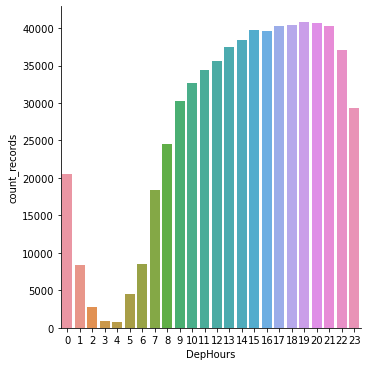

In [39]:

plot = sns.catplot(data = delaydataonly, kind = 'bar', x = 'DepHours', y = 'count_records')

In [40]:
#Plotting notdelaydata for DepHours
notdelaydataonly = plot_df.query('delayornot == "notdelayed"')

delaydataonly = plot_df.query('delayornot == "delayed"')

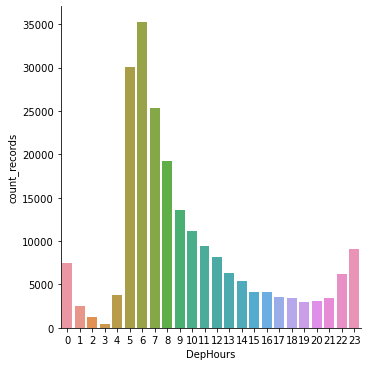

In [41]:
plot = sns.catplot(data = notdelaydataonly, kind = 'bar', x = 'DepHours', y = 'count_records')

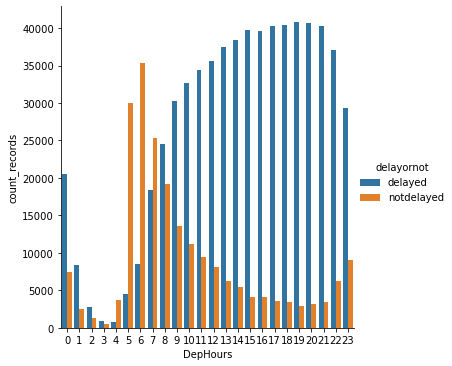

In [42]:
#Plotting data and seeing if delayornot for DepHours
plot = sns.catplot(data = plot_df, kind = 'bar', x = 'DepHours', y = 'count_records', hue = 'delayornot')

Day of Week plottings

In [43]:
#checking delay or not and taking day of week and counting how many in total df=data frame
plot_df2 = checkingdelays.groupby(['delayornot','DayOfWeek']).agg(count_records = ('ind','count')).reset_index()


In [44]:
#Plotting notdelaydata for DayOfWeek
notdelaydataonly_week = plot_df2.query('delayornot == "notdelayed"')

delaydataonly_week = plot_df2.query('delayornot == "delayed"')

In [45]:
delaydataonly_week.head()

,delayornot,DayOfWeek,count_records
0,delayed,1,96464
1,delayed,2,86139
2,delayed,3,90549
3,delayed,4,97361
4,delayed,5,101056


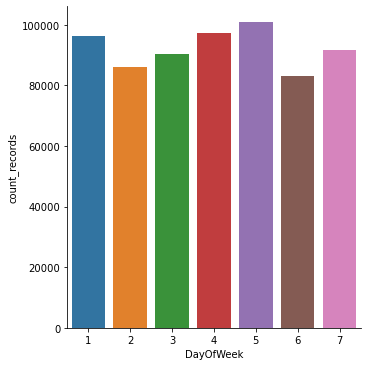

In [46]:
#Plotting Delaydata for DayOfWeek
plot = sns.catplot(data = delaydataonly_week, kind = 'bar', x = 'DayOfWeek', y = 'count_records')

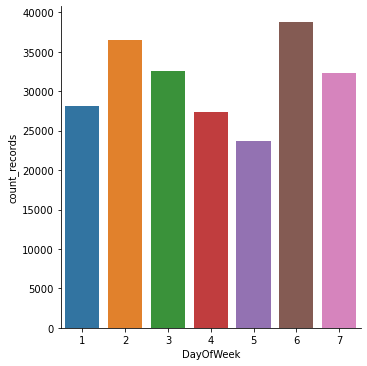

In [47]:
plot = sns.catplot(data = notdelaydataonly_week, kind = 'bar', x = 'DayOfWeek', y = 'count_records')

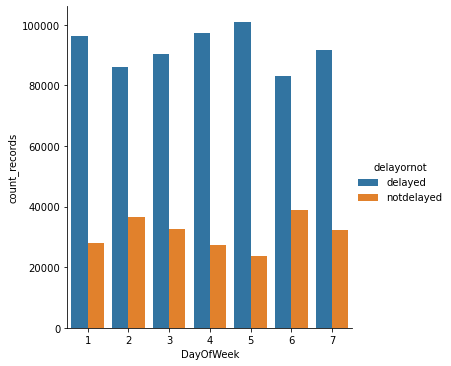

In [48]:
plot = sns.catplot(data = plot_df2, kind = 'bar', x = 'DayOfWeek', y = 'count_records', hue = 'delayornot')

Plottings for time of Year

In [49]:
checkingdelays['MonthAndYear'] = checkingdelays['Year'].astype(str) +'-'+ checkingdelays['Month'].astype(str)

In [50]:
#checking delay or not and taking time of year and counting how many in total df=data frame
plot_df3 = checkingdelays.groupby(['delayornot','MonthAndYear']).agg(count_records = ('ind','count')).reset_index()

In [51]:
#Plotting Delaydata for MonthAndYear
delaydataonly = plot_df3.query('delayornot == "delayed"')



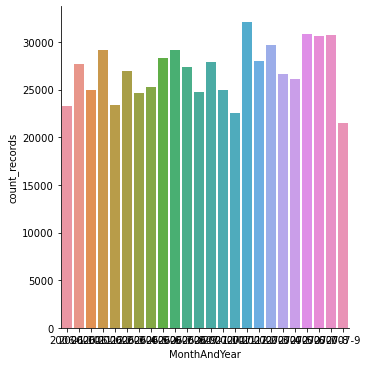

In [52]:
plot = sns.catplot(data = delaydataonly, kind = 'bar', x = 'MonthAndYear', y = 'count_records')

In [53]:
#Plotting notdelaydata for MonthAndYear
notdelaydataonly = plot_df3.query('delayornot == "notdelayed"')



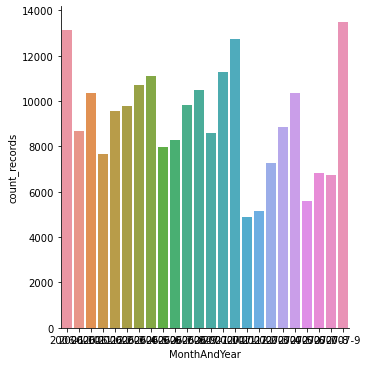

In [54]:
plot = sns.catplot(data = notdelaydataonly, kind = 'bar', x = 'MonthAndYear', y = 'count_records')

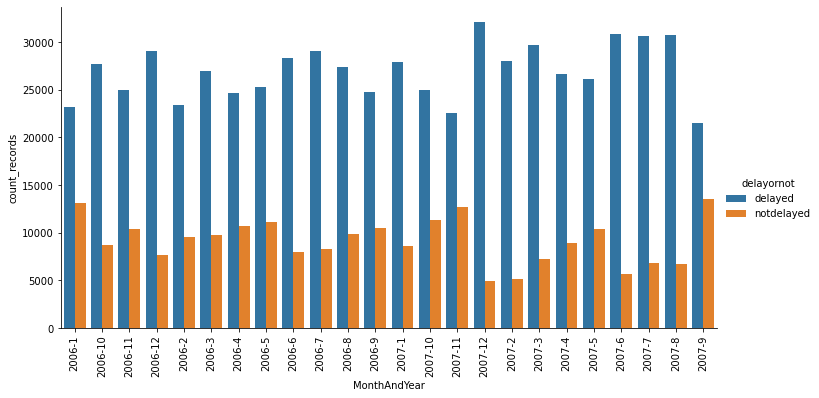

In [55]:
plot = sns.catplot(data = plot_df3, kind = 'bar', x = 'MonthAndYear', y = 'count_records', hue = 'delayornot', aspect = 2)
#rotates the bottom labels
plot.set_xticklabels(rotation = 90)

In [56]:
checkingdelays.head()

,Year,Month,DayofMonth,DayOfWeek,DepHours,DepMinutes,ArrivalDelay,DepartureDelay,alldelay,delayornot,ind,MonthAndYear
0,2006,1,1,7,0,1,18.0,16.0,34.0,delayed,0,2006-1
1,2006,1,1,7,0,2,55.0,59.0,114.0,delayed,1,2006-1
2,2006,1,1,7,0,3,-13.0,-12.0,-25.0,notdelayed,2,2006-1
3,2006,1,1,7,0,4,48.0,64.0,112.0,delayed,3,2006-1
4,2006,1,1,7,0,5,91.0,75.0,166.0,delayed,4,2006-1


In [57]:
checkingdelays.describe()

,Year,Month,DayofMonth,DayOfWeek,DepHours,DepMinutes,ArrivalDelay,DepartureDelay,alldelay,ind
count,865947.00000,865947.000000,865947.000000,865947.000000,865947.000000,865947.000000,865947.000000,865947.000000,865947.000000,865947.000000
mean,2006.50067,6.526658,15.733435,3.998468,13.292577,29.613401,155.857048,176.816958,332.674005,432973.000000
std,0.50000,3.439980,8.795105,2.000248,6.065036,17.377820,251.566901,229.973904,476.184760,249977.511115
min,2006.00000,1.000000,1.000000,1.000000,0.000000,0.000000,-741.000000,-2374.000000,-1803.000000,0.000000
25%,2006.00000,4.000000,8.000000,2.000000,9.000000,15.000000,-10.000000,11.000000,0.000000,216486.500000
50%,2007.00000,7.000000,16.000000,4.000000,13.000000,30.000000,87.000000,111.000000,197.000000,432973.000000
75%,2007.00000,10.000000,23.000000,6.000000,18.000000,45.000000,258.000000,269.000000,524.000000,649459.500000
max,2007.00000,12.000000,31.000000,7.000000,23.000000,59.000000,3313.000000,3341.000000,6654.000000,865946.000000


# Finding percentages for least delays for each category

In [58]:
#checking no delays
nodelaydata = checkingdelays.query('alldelay< 1')

In [59]:
#checking delays
delaydata = checkingdelays.query('alldelay> 1')

In [60]:
delaydata.shape

(646531, 12)

In [61]:
#% of delays for each hour ,  normalize shows % of data set
delaydata.DepHours.value_counts(normalize = True)

19    0.063179
20    0.062919
18    0.062517
21    0.062395
17    0.062305
15    0.061369
16    0.061357
14    0.059315
13    0.058020
22    0.057297
12    0.055159
11    0.053167
10    0.050545
9     0.046770
23    0.045357
8     0.038021
0     0.031782
7     0.028495
6     0.013158
1     0.013009
5     0.007045
2     0.004261
3     0.001346
4     0.001213
Name: DepHours, dtype: float64

In [62]:
nodelaydata.shape

(217541, 12)

In [63]:
nodelaydata.tail(50)

,Year,Month,DayofMonth,DayOfWeek,DepHours,DepMinutes,ArrivalDelay,DepartureDelay,alldelay,delayornot,ind,MonthAndYear
865060,2007,12,31,1,9,9,-76.0,-52.0,-128.0,notdelayed,865060,2007-12
865074,2007,12,31,1,9,23,-41.0,-15.0,-56.0,notdelayed,865074,2007-12
865097,2007,12,31,1,9,46,-124.0,13.0,-111.0,notdelayed,865097,2007-12
865108,2007,12,31,1,9,57,-65.0,-44.0,-109.0,notdelayed,865108,2007-12
865127,2007,12,31,1,10,16,-72.0,25.0,-47.0,notdelayed,865127,2007-12
865285,2007,12,31,1,12,54,-44.0,40.0,-4.0,notdelayed,865285,2007-12
865343,2007,12,31,1,13,52,-71.0,41.0,-30.0,notdelayed,865343,2007-12
865570,2007,12,31,1,17,39,-123.0,32.0,-91.0,notdelayed,865570,2007-12
865592,2007,12,31,1,18,1,-33.0,12.0,-21.0,notdelayed,865592,2007-12
865637,2007,12,31,1,18,46,-42.0,-6.0,-48.0,notdelayed,865637,2007-12


In [64]:
#% of delays for each hour ,  normalize shows % of data set
nodelaydata.DepHours.value_counts(normalize = True)

6     0.161868
5     0.136737
7     0.116148
8     0.087914
9     0.061924
10    0.050735
11    0.043008
23    0.041059
12    0.037096
0     0.033309
13    0.028629
22    0.028326
14    0.024791
16    0.018865
15    0.018801
4     0.016930
17    0.016103
21    0.015542
18    0.015441
20    0.014140
19    0.013418
1     0.011506
2     0.005682
3     0.002027
Name: DepHours, dtype: float64

In [65]:
#% of delays for each year ,  normalize shows % of data set
nodelaydata.Year.value_counts(normalize = True)

2006    0.535982
2007    0.464018
Name: Year, dtype: float64

In [66]:
delaydata.Year.value_counts(normalize = True)

2007    0.513044
2006    0.486956
Name: Year, dtype: float64

In [67]:
#% of delays for each year ,  normalize shows % of data set
delaydata.Month.value_counts(normalize = True)

12    0.094718
7     0.092399
6     0.091508
8     0.089833
3     0.087546
10    0.081467
5     0.079597
2     0.079521
4     0.079316
1     0.079124
11    0.073430
9     0.071540
Name: Month, dtype: float64

In [68]:
nodelaydata.Month.value_counts(normalize = True)

9     0.109685
11    0.105332
1     0.098956
5     0.097857
10    0.090925
4     0.089321
3     0.077820
8     0.075554
7     0.068677
2     0.067068
6     0.061818
12    0.056987
Name: Month, dtype: float64

In [69]:
delaydata['MonthAndYear'] = delaydata['Year'].astype(str) +'-'+ delaydata['Month'].astype(str)

In [70]:
#% of delays for time of year ,  normalize shows % of data set
delaydata.MonthAndYear.value_counts(normalize = True)

2007-12    0.049691
2007-6     0.047735
2007-8     0.047487
2007-7     0.047377
2007-3     0.045913
2006-12    0.045026
2006-7     0.045022
2006-6     0.043774
2007-2     0.043297
2007-1     0.043183
2006-10    0.042818
2006-8     0.042346
2006-3     0.041633
2007-4     0.041208
2007-5     0.040427
2006-5     0.039171
2007-10    0.038649
2006-11    0.038546
2006-9     0.038348
2006-4     0.038108
2006-2     0.036224
2006-1     0.035941
2007-11    0.034885
2007-9     0.033193
Name: MonthAndYear, dtype: float64

In [71]:
nodelaydata['MonthAndYear'] = nodelaydata['Year'].astype(str) +'-'+ nodelaydata['Month'].astype(str)

In [72]:
nodelaydata.MonthAndYear.value_counts(normalize = True)

2007-9     0.061735
2006-1     0.059809
2007-11    0.058159
2007-10    0.051402
2006-5     0.050671
2006-4     0.048915
2006-9     0.047950
2007-5     0.047187
2006-11    0.047173
2006-8     0.044792
2006-3     0.044713
2006-2     0.043638
2007-4     0.040406
2006-10    0.039524
2007-1     0.039147
2006-7     0.037708
2006-6     0.036255
2006-12    0.034835
2007-3     0.033106
2007-7     0.030969
2007-8     0.030762
2007-6     0.025563
2007-2     0.023430
2007-12    0.022152
Name: MonthAndYear, dtype: float64

In [73]:
#% of delays for each day in the week ,  normalize shows % of data set
nodelaydata.DayOfWeek.value_counts(normalize = True)

6    0.176868
2    0.166387
3    0.148818
7    0.147158
1    0.128210
4    0.124487
5    0.108072
Name: DayOfWeek, dtype: float64

In [74]:
#% of delays for each day ,  normalize shows % of data set
delaydata.DayOfWeek.value_counts(normalize = True)

5    0.156305
4    0.150590
1    0.149202
7    0.142015
3    0.140054
2    0.133233
6    0.128602
Name: DayOfWeek, dtype: float64